<a href="https://colab.research.google.com/github/RKS8347/Ml-projects/blob/main/Kidney_Chronic_Project(20_09_2024_to_21_09_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading Data sets
chronic_df=pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#check info of columns and null values
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# Drop Column Id
chronic_df=chronic_df.drop('id',axis=1)
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Rename columns for user friendly interface
chronic_df.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# converting datatype from float to object
chronic_df[['specific_gravity','albumin','sugar']]=chronic_df[['specific_gravity','albumin','sugar']].astype('object')

In [ ]:
# converting object type into numerical type
chronic_df['packed_cell_volume']=pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['white_blood_cell_count']=pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count']=pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [ ]:
# List comprehension
cat_col=[col for col in chronic_df.columns if chronic_df[col].dtype=='object']
num_cols=[col for col in chronic_df.columns if chronic_df[col].dtype!='object']

In [ ]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [ ]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
# by looping & looking at unique values in categorical columns
for col in cat_col:
  print(f"{col} has {chronic_df[col].unique()} values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values like '\tno','\tyes'['diabetes_mellitus'].replace({'yes' : 'yes','\tno' : 'no','\tyes':'yes'},inplace=True)['coronary_artery_disease'].replace({'\tno' : 'no'},inplace=True)['class'].replace({'\ckd\t' : 'ckd'},inplace=True)
chronic_df['diabetes_mellitus'].replace({'yes' : 'yes','\tno' : 'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno' : 'no'},inplace=True)
chronic_df['class'].replace({'ckd\t' : 'ckd'},inplace=True)

In [ ]:
# converting target columns into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class']=chronic_df['class'].map({'ckd': 0,'notckd':1})

#converting target columns into numerical correlation
chronic_df['class']=pd.to_numeric(chronic_df['class'],errors='coerce')

In [ ]:
chronic_df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [ ]:
# Cols in numerical col list
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

# **Exploratory data analysis** **(EDA)**

<Figure size 1500x800 with 0 Axes>

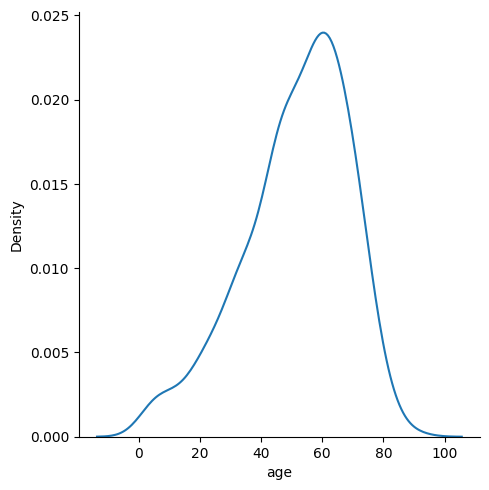

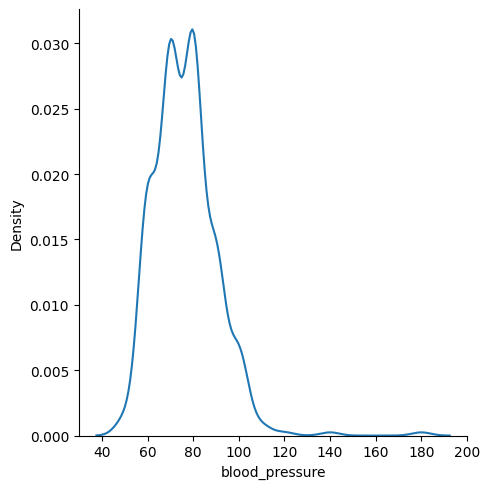

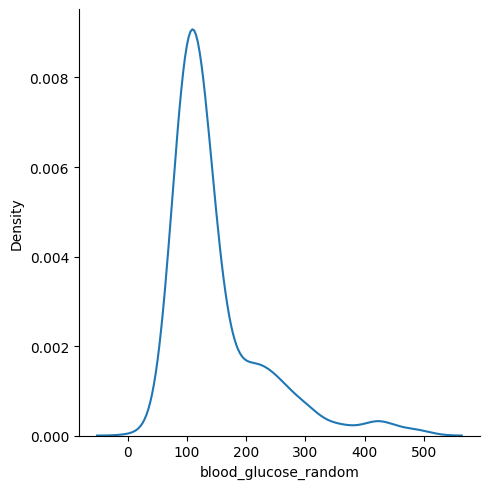

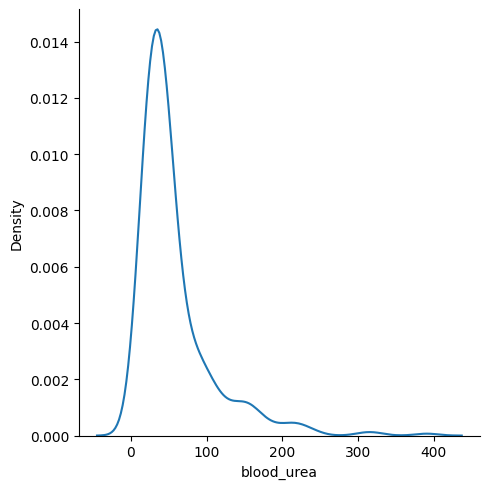

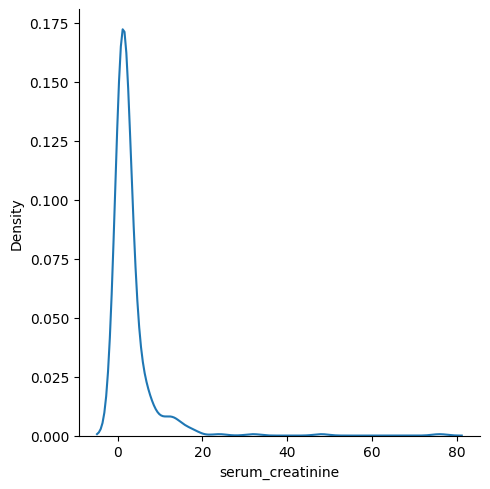

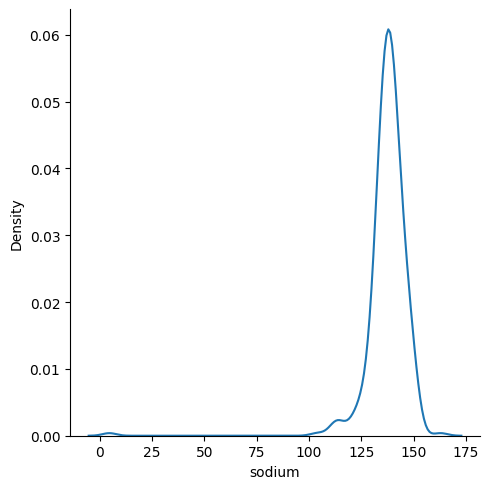

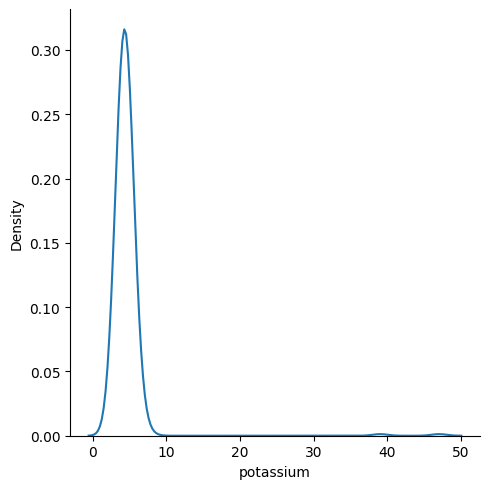

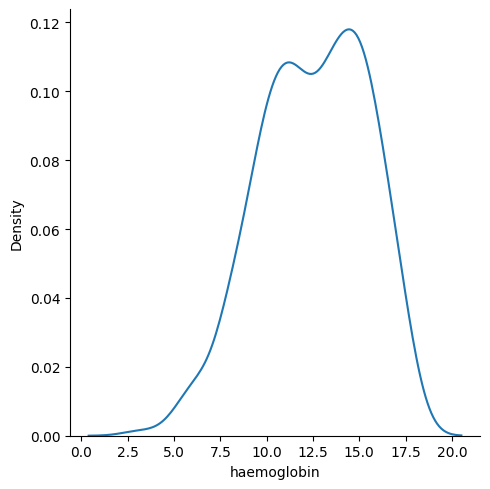

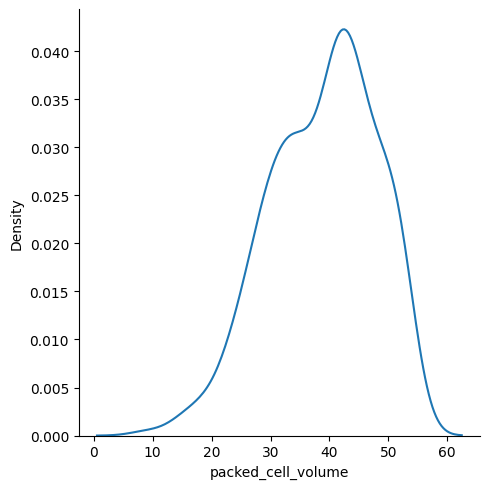

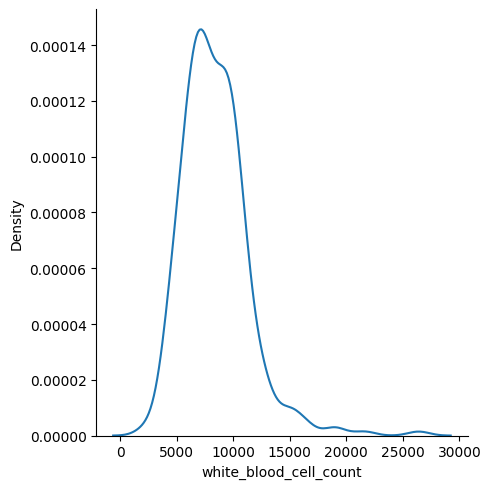

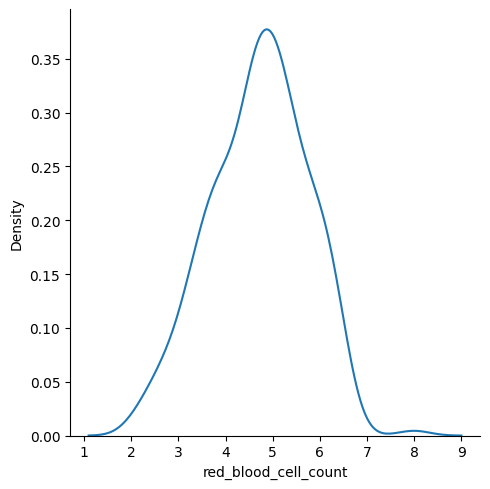

In [ ]:
# checking numerical features distribution
plt.figure(figsize=(15,8))


# looping over numerical cols and checking its distribution
for col in num_cols:
  sns.displot(chronic_df[col],kind='kde') # kernel distribution plot



In [ ]:
# categorial columns to be check
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

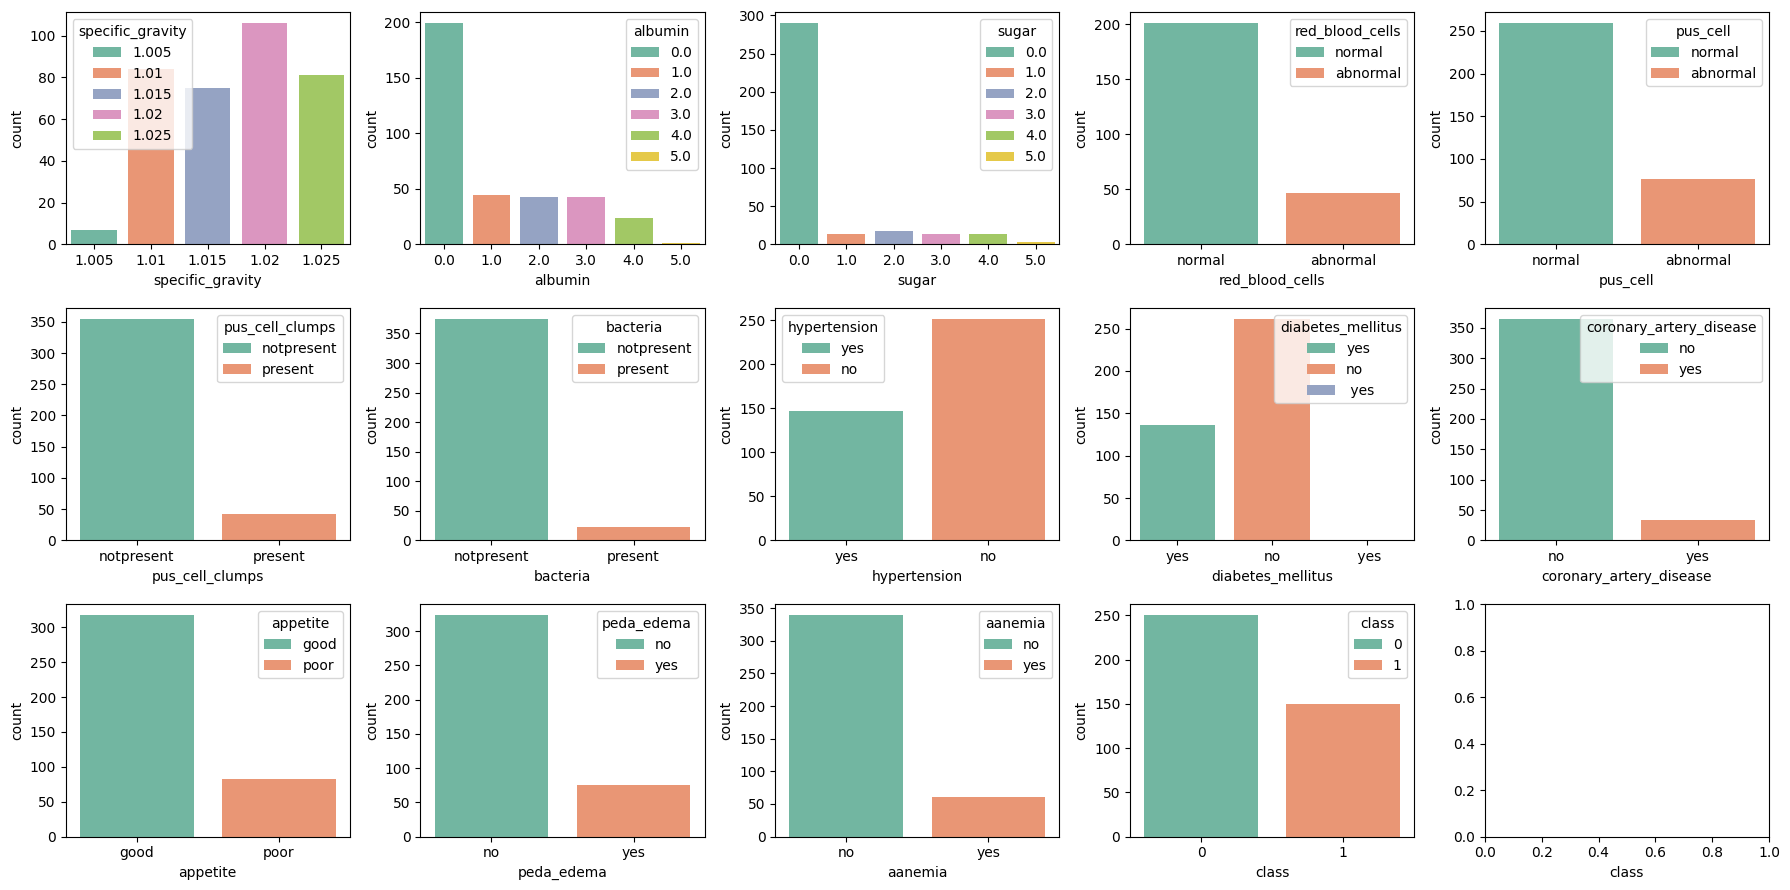

In [ ]:
# create the figure and axes
fig,axes=plt.subplots(3,5,figsize=(18,9))

axes=axes.ravel() # flattening array makes indexing easier

# loop over columns
for col,ax in zip(cat_col,axes):
  sns.countplot(data=chronic_df,x=col,ax=ax,hue=col,palette='Set2',)
  plt.xlabel(col)
  fig.tight_layout() # to see columns adujust plot


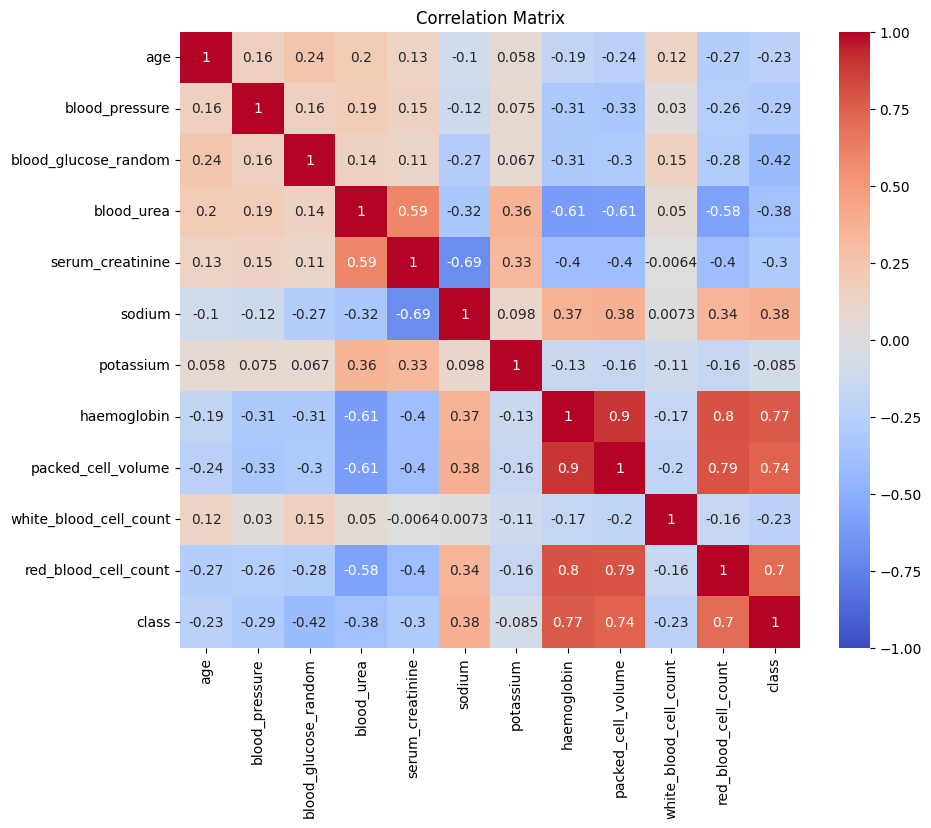

In [ ]:
# correlation matrix by heat map(relation between numerical variable)
# Step 1: Compute the correlation matrix
corr_matrix = chronic_df.corr(numeric_only=True) # add numeric_only argument

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# check count of all null values in whole df
chronic_df.isna().sum().sort_values(ascending=False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [ ]:
# lets check count of all null values in num_cols
chronic_df[num_cols].isna().sum().sort_values(ascending=False)


,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
haemoglobin,52
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
blood_pressure,12


In [ ]:
# lets check count of all null values in cat_cols
chronic_df[cat_col].isna().sum().sort_values(ascending=False)

,0
red_blood_cells,152
pus_cell,65
sugar,49
specific_gravity,47
albumin,46
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2


## **missing value treatment**

In [ ]:
# filling null values ,we will use two method,random sampling for higher null values
# mean/mode sampling for lower null values

# creating function for imputing random values
def random_value_imputation(feature):
  random_sample=chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
  random_sample.index=chronic_df[chronic_df[feature].isnull()].index
  chronic_df.loc[chronic_df[feature].isnull(),feature]=random_sample

# this function is for categorical columns
def impute_method(feature):
  mode=chronic_df[feature].mode()[0]
  chronic_df[feature]=chronic_df[feature].fillna(mode)

In [ ]:
# fill num_cols null values using random sampling method
for col in num_cols:
  random_value_imputation(col)

In [ ]:
# check null values in num_cols
chronic_df[num_cols].isna().sum().sort_values(ascending=False)

,0
age,0
blood_pressure,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0
haemoglobin,0
packed_cell_volume,0
white_blood_cell_count,0


In [ ]:
# filling red_blood_cell and pus_cell using random sampling method and rest of cat_col using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [ ]:
# checking count of null values in cat_cols again
chronic_df[cat_col].isna().sum().sort_values(ascending=False)

,0
sugar,49
specific_gravity,47
albumin,46
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1


In [ ]:
# filling cat null values with mode treatment
for col in cat_col:
  impute_method(col)

In [ ]:
chronic_df[cat_col].isna().sum().sort_values(ascending=False)

,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0


In [ ]:
# checking head of data frame
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,298.0,...,38.0,6000.0,5.9,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.8,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [ ]:
# check unique values in each cat col by looping over cat cols
for col in cat_col:
  print(f"{col} has {chronic_df[col].nunique()} categories")

specific_gravity has 5 categories
albumin has 6 categories
sugar has 6 categories
red_blood_cells has 2 categories
pus_cell has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes_mellitus has 3 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
peda_edema has 2 categories
aanemia has 2 categories
class has 2 categories


In [ ]:
# Using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col[3:]:
  chronic_df[col]=le.fit_transform(chronic_df[col])

In [ ]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,298.0,...,38.0,6000.0,5.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


## **Model Building**

In [ ]:
# split data into features and target variable(x and y)
X=chronic_df.drop('class',axis=1)
y=chronic_df['class']

In [ ]:
# splitting data into training test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
# import KNeighborsClassifier,accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
# all metrices of classification problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# accuracy score,confusion matrix and classification report of knn
knn_acc=accuracy_score(y_test,knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train,knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,knn.predict(X_test))}\n")

print(f"Classification Report :- \n{classification_report(y_test,knn.predict(X_test))}")

Training Accuracy of KNN is 0.8035714285714286
Test Accuracy of KNN is 0.6833333333333333

Confusion Matrix :- 
[[56 16]
 [22 26]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        72
           1       0.62      0.54      0.58        48

    accuracy                           0.68       120
   macro avg       0.67      0.66      0.66       120
weighted avg       0.68      0.68      0.68       120



In [ ]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

dtc_acc=accuracy_score(y_test,dtc.predict(X_test))
print(dtc_acc)

print(f"Training accuracy of dtc is{accuracy_score(y_train,dtc.predict(X_train))}")
print(f"Testing accuracy of dtc is{accuracy_score(y_test,dtc.predict(X_test))}")

# confusion matrix
print(f"confusion Matrix:- \n{confusion_matrix(y_test,dtc.predict(X_test))}\n")

print(f"Classification Report:- \n{classification_report(y_test,dtc.predict(X_test))}\n")



0.9666666666666667
Training accuracy of dtc is1.0
Testing accuracy of dtc is0.9666666666666667
confusion Matrix:- 
[[69  3]
 [ 1 47]]

Classification Report:- 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.94      0.98      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120




## **hyper parameter tuning**

In [ ]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}

#Apply gridsearch with cv=5,n_jobs=-1,verbose='1

grid_search_dtc=GridSearchCV(dtc,grid_param,cv=5,n_jobs=-1,verbose=1)

grid_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# print_best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)

print(grid_search_dtc.best_score_)



{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9892857142857142


In [ ]:
# storing best estimator

dtc= grid_search_dtc.best_estimator_

# accuracy score,confusion matrix,and classification report oF decision tree

dtc_acc=accuracy_score(y_test,dtc.predict(X_test))

print(f'Training accuracy of Decision tree classifier is {accuracy_score(y_train,dtc.predict(X_train))}\n')

print(f'Testing accuracy of Decision tree classifier is {dtc_acc}')

print(f"confusion matrix:-\n{confusion_matrix(y_test,dtc.predict(X_test))}")

print(f"classification Report:-\n{classification_report(y_test,dtc.predict(X_test))}")


Training accuracy of Decision tree classifier is 0.9785714285714285

Testing accuracy of Decision tree classifier is 0.9583333333333334
confusion matrix:-
[[72  0]
 [ 5 43]]
classification Report:-
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



# **Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#create random forest classifier
rd_clf = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='sqrt',min_samples_leaf= 2,min_samples_split=3,n_estimators=130)
rd_clf.fit(X_train, y_train)
# accuracy score,confusion matrix, and classificatio report

rf_acc =accuracy_score(y_test, rd_clf.predict(X_test))

print(f"training accuracy of rfc is {accuracy_score(y_train,rd_clf.predict(X_train))}")

print(f"test accuracy of rfc is {rf_acc}")

print(f"confusion matrix:- \n{confusion_matrix(y_test,rd_clf.predict(X_test))}")

print(f"classification report:- \n{classification_report(y_test,rd_clf.predict(X_test))}")




training accuracy of rfc is 0.9964285714285714
test accuracy of rfc is 0.9916666666666667
confusion matrix:- 
[[72  0]
 [ 1 47]]
classification report:- 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#create random forest classifier
# max_features has been changed to sqrt
rd_clf = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='sqrt',min_samples_leaf= 2,min_samples_split=3,n_estimators=130)
rd_clf.fit(X_train, y_train)
# accuracy score,confusion matrix, and classificatio report

rf_acc =accuracy_score(y_test, rd_clf.predict(X_test))

print(f"training accuracy of rfc is {accuracy_score(y_train,rd_clf.predict(X_train))}")

print(f"test accuracy of rfc is {rf_acc}")

print(f"confusion matrix:- \n{confusion_matrix(y_test,rd_clf.predict(X_test))}")

print(f"classification report:- \n{classification_report(y_test,rd_clf.predict(X_test))}")

training accuracy of rfc is 0.9964285714285714
test accuracy of rfc is 0.9833333333333333
confusion matrix:- 
[[72  0]
 [ 2 46]]
classification report:- 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
# import Adaboostclassifier
from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train,y_train)

# accuracy score,confusion_matrix and classification report

ada_acc=accuracy_score(y_test,ada.predict(X_test))

print(f"Training accuracy of ada :- {accuracy_score(y_train,ada.predict(X_train))}")

print(f"testing accuracy of adc is {knn_acc} \n")

print(f"confusion matrix:-\n{confusion_matrix(y_test,ada.predict(X_test))}\n")
print(f"classification report:-\n{classification_report(y_test,ada.predict(X_test))}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training accuracy of ada :- 1.0
testing accuracy of adc is 0.6833333333333333 

confusion matrix:-
[[72  0]
 [ 1 47]]

classification report:-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
# import Gradiant boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

#accuracy score,confusion matrix and classifiation

gb_acc=accuracy_score(y_test,gb.predict(X_test))

print(f"training accuracy of gb is {accuracy_score(y_train,gb.predict(X_train))}")
print(f"Test Accuracy of gb is{knn_acc}\n")

print(f"Confusion Matrix:-\n{confusion_matrix(y_test,gb.predict(X_test))}")
print(f"classification report:-\n{classification_report(y_test,gb.predict(X_test))}")




training accuracy of gb is 1.0
Test Accuracy of gb is0.6833333333333333

Confusion Matrix:-
[[72  0]
 [ 2 46]]
classification report:-
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
# we are defining the gradiant boosting classifier with help of some Hyperparameters
# like max_depth=4,subsample=0.90,max_features=0.75,n_estimators=200
sgb=GradientBoostingClassifier(max_depth=4,subsample=0.90,max_features=0.75,n_estimators=200)
sgb.fit(X_train,y_train)

# accuracy score,confusion matrix and classification report
gb_acc=accuracy_score(y_test,gb.predict(X_test))

print(f"training accuracy of gb is {accuracy_score(y_train,gb.predict(X_train))}")
print(f"Test Accuracy of gb is{knn_acc}\n")

print(f"Confusion Matrix:-\n{confusion_matrix(y_test,gb.predict(X_test))}")
print(f"classification report:-\n{classification_report(y_test,gb.predict(X_test))}")

training accuracy of gb is 1.0
Test Accuracy of gb is0.6833333333333333

Confusion Matrix:-
[[72  0]
 [ 2 46]]
classification report:-
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
# import XGBclassifier
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.5,max_depth=5,n_estimators=150)
xgb.fit(X_train,y_train)

# accuracy score,confusion matrix and classification report
xgb_acc=accuracy_score(y_test,xgb.predict(X_test))

print(f"training accuracy of xgb is {accuracy_score(y_train,xgb.predict(X_train))}")
print(f"Test Accuracy of xgb is{knn_acc}\n")

print(f"Confusion Matrix:-\n{confusion_matrix(y_test,xgb.predict(X_test))}")
print(f"classification report:-\n{classification_report(y_test,xgb.predict(X_test))}")

training accuracy of xgb is 1.0
Test Accuracy of xgb is0.6833333333333333

Confusion Matrix:-
[[72  0]
 [ 2 46]]
classification report:-
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
!pip install catboost

In [ ]:
# import catboost classifier
from catboost import CatBoostClassifier

cat=CatBoostClassifier(iterations=10)
cat.fit(X_train,y_train)

# accuracy score ,confusion matrix and classification  report of cat boost
cat_acc=accuracy_score(y_test,cat.predict(X_test))

print(f"training accuracy of cat is {accuracy_score(y_train,cat.predict(X_train))}")
print(f"Test Accuracy of cat is{knn_acc}\n")

print(f"Confusion Matrix:-\n{confusion_matrix(y_test,cat.predict(X_test))}")
print(f"classification report:-\n{classification_report(y_test,cat.predict(X_test))}")

Learning rate set to 0.408198
0:	learn: 0.2840984	total: 2.48ms	remaining: 22.3ms
1:	learn: 0.1417123	total: 4.56ms	remaining: 18.2ms
2:	learn: 0.0944623	total: 6.62ms	remaining: 15.5ms
3:	learn: 0.0627307	total: 8.64ms	remaining: 13ms
4:	learn: 0.0449437	total: 10.7ms	remaining: 10.7ms
5:	learn: 0.0337970	total: 12.5ms	remaining: 8.36ms
6:	learn: 0.0280468	total: 14.5ms	remaining: 6.21ms
7:	learn: 0.0236617	total: 16.5ms	remaining: 4.13ms
8:	learn: 0.0198100	total: 18.5ms	remaining: 2.06ms
9:	learn: 0.0170740	total: 20.5ms	remaining: 0us
training accuracy of cat is 1.0
Test Accuracy of cat is0.6833333333333333

Confusion Matrix:-
[[71  1]
 [ 1 47]]
classification report:-
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98   

In [ ]:
# import LGBMclassifier
from lightgbm import LGBMClassifier

lgbm=LGBMClassifier(learning_rate=1)
lgbm.fit(X_train,y_train)

# accuracy score,confusion matrix and classification report of lgbm
lgbm_acc=accuracy_score(y_test,lgbm.predict(X_test))

print(f"training accuracy of lgbm is {accuracy_score(y_train,lgbm.predict(X_train))}")
print(f"Test Accuracy of lgbm is{knn_acc}\n")

print(f"Confusion Matrix:-\n{confusion_matrix(y_test,lgbm.predict(X_test))}")
print(f"classification report:-\n{classification_report(y_test,lgbm.predict(X_test))}")

[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
# comparing all models accuracy by creating data frame

models=pd.DataFrame({
    'model':['KNN','Decission Tree Classifier','Random Forest Classifier','ada boost Classifier','Gradiant Boosting Classifier',
             'Stochastic Gradient Boosting','XgBoost','cat Boost','Extra Trees Classifier'],
    'score': [knn_acc,dtc_acc,rf_acc,ada_acc,gb_acc,sgb_acc,xgb_acc,cat_acc, lgbm_acc] # Add lgbm_acc for Extra Trees Classifier
})

#  sort score by values

models.sort_values(by='score',ascending=False)

,model,score
5,Stochastic Gradient Boosting,1.000000
3,ada boost Classifier,0.991667
2,Random Forest Classifier,0.983333
4,Gradiant Boosting Classifier,0.983333
6,XgBoost,0.983333
7,cat Boost,0.983333
8,Extra Trees Classifier,0.983333
1,Decission Tree Classifier,0.958333
0,KNN,0.683333
